In [1]:
import os
import json
import torch
import trimesh
from PIL import Image
import matplotlib.pyplot as plt
import clip
from torchvision.transforms import Compose, Normalize, Resize, CenterCrop, InterpolationMode
from transformers import AutoImageProcessor, AutoModel

from NPHM.data.manager import DataManager
from NPHM.utils.mesh_operations import cut_trimesh_vertex_mask

device = "cuda" if torch.cuda.is_available() else "cpu"
# --- CLIP ---
CLIP_model, CLIP_preprocess = clip.load("ViT-B/32", device=device)
# --- DINO ---
DINO_processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
DINO_model = AutoModel.from_pretrained('facebook/dinov2-base').to(device)

/opt/anaconda3/envs/NPHM/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/envs/NPHM/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowExxb
  Referenced from: /opt/anaconda3/envs/NPHM/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /opt/anaconda3/envs/NPHM/lib/python3.9/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [2]:
heads = []

head_data = {}
head_data['subject'] = '017'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young Asian man with oval face, monolid eyes, snub nose and short hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '018'
head_data['expression neutral'] = '008'
head_data['description neutral'] = 'A young woman with square face, round eyes, straight big nose, thin lips and ponytail.'
heads.append(head_data)
'''
head_data = {}
head_data['subject'] = '019'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young man with oblong face, small eyes, straight nose, defined cheekbones, straight eyebrows and short hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '020'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'An overweight young Asian man with rectangular face, monolid eyes, snub nose, undefined jawline and side-parted hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '022'
head_data['expression neutral'] = '009'
head_data['description neutral'] = 'A young Asian man with oblong face, monolid eyes, straight wide nose, short eyebrows and undercut hairstyle.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '023'
head_data['expression neutral'] = '009'
head_data['description neutral'] = 'A young Asian woman with oval face, monolid eyes, small nose and side-parted hair in a ponytail.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '024'
head_data['expression neutral'] = '008'
head_data['description neutral'] = 'A man with large forehead, protruding chin, full lips, downturned puffy eyes, straight nose and undefined jawline.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '025'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young man with triangular face, small and close-set eyes, straight narrow nose, protruding chin and short hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '026'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young man with oval face, straight nose, defined jawline and long hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '027'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young woman with ovaal face, almond-shaped eyes, wide lips, pointy nose, definded cheekbones and ponytail.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '028'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young Asian woman with oval face, monolid eyes, snub nose and ponytail with strands of hair falling into her face.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '029'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'An old man with emaciated face, defined cheekbones, defined jawline, Roman narrow nose, puffy eyes, long chin beard and short hair.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '031'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young Asian man with oval face, monolid eyes, short straight nose and side-parted undercut.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '032'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young man with rectangular face, receding hairline, narrow hooded eyes, straight nose and undefined jawline.'
heads.append(head_data)

head_data = {}
head_data['subject'] = '033'
head_data['expression neutral'] = '010'
head_data['description neutral'] = 'A young man with Roman nose, small lips, round puffy eyes, long straight nose, defined jawline and long hair'
heads.append(head_data)

head_data = {}
head_data['subject'] = '034'
head_data['expression neutral'] = '010'
heads.append(head_data)

head_data = {}
head_data['subject'] = '035'
head_data['expression neutral'] = '010'
heads.append(head_data)

head_data = {}
head_data['subject'] = '036'
head_data['expression neutral'] = '010'
heads.append(head_data)

head_data = {}
head_data['subject'] = '037'
head_data['expression neutral'] = '009'
heads.append(head_data)

head_data = {}
head_data['subject'] = '038'
head_data['expression neutral'] = '010'
heads.append(head_data)

head_data = {}
head_data['subject'] = '039'
head_data['expression neutral'] = '010'
heads.append(head_data)

head_data = {}
head_data['subject'] = '040'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '041'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '042'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '043'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '044'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '045'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '046'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '048'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '049'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '050'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '051'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '052'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '053'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '054'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '055'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '056'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '057'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '058'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '059'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '060'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '061'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '062'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '063'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '064'
head_data['expression neutral'] = '024'
heads.append(head_data)

head_data = {}
head_data['subject'] = '065'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '067'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '068'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '069'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '070'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '071'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '072'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '073'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '074'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '075'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '076'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '077'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '078'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '079'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '080'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '081'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '082'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '083'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '084'
head_data['expression neutral'] = '000'
heads.append(head_data)

head_data = {}
head_data['subject'] = '085'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '086'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '087'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '088'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '089'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '090'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '091'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '092'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '093'
head_data['expression neutral'] = '000'
heads.append(head_data)

head_data = {}
head_data['subject'] = '094'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '095'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '096'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '097'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '098'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '106'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '108'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '109'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '110'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '111'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '112'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '113'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '114'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '115'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '116'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '117'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '118'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '120'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '121'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '122'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '123'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '124'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '125'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '126'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '127'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '128'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '129'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '130'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '131'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '132'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '133'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '134'
head_data['expression neutral'] = '022'
heads.append(head_data)

head_data = {}
head_data['subject'] = '135'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '136'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '137'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '140'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '141'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '142'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '143'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '144'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '145'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '146'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '147'
head_data['expression neutral'] = '003'
heads.append(head_data)

head_data = {}
head_data['subject'] = '148'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '149'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '150'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '151'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '162'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '163'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '164'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '165'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '167'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '168'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '174'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '179'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '180'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '181'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '182'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '183'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '184'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '185'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '186'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '187'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '188'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '189'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '190'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '191'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '193'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '194'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '195'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '196'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '198'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '199'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '200'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '201'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '202'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '204'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '206'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '207'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '209'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '210'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '211'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '212'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '213'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '214'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '215'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '216'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '217'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '218'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '220'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '221'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '223'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '224'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '226'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '227'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '228'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '229'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '231'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '232'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '233'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '234'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '235'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '237'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '238'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '239'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '240'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '241'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '242'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '243'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '244'
head_data['expression neutral'] = '002'
heads.append(head_data)

head_data = {}
head_data['subject'] = '245'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '246'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '247'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '248'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '249'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '250'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '251'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '252'
head_data['expression neutral'] = '001'
heads.append(head_data)

head_data = {}
head_data['subject'] = '254'
head_data['expression neutral'] = '001'
heads.append(head_data)
'''
data = {"heads": heads}

In [3]:
# --- Rendering Function ---

def phong_model(sdf, points, camera_position, phong_params, light_params, mesh_path, subj_number, expr_number, index_tri=None):
    
    # Option 1: Use SDF
    #normals = estimate_normals(sdf, points)
    # Option 2: Use Mesh
    normals = mesh_normals(mesh_path, index_tri, subj_number, expr_number)
    view_dirs = points - camera_position 
    light_dir_1 = light_params["light_dir_1"].repeat(points.shape[0], 1) 
    light_dir_p = points - light_params["light_pos_p"].repeat(points.shape[0], 1)
    
    # Normalize all vectors
    normals = (normals.T / torch.norm(normals, dim=-1)).T
    light_dir_norm_1 = (light_dir_1.T / torch.norm(light_dir_1, dim=-1)).T
    light_dir_norm_p = (light_dir_p.T / torch.norm(light_dir_p, dim=-1)).T
    view_dir_norm = (view_dirs.T / torch.norm(view_dirs, dim=-1)).T
    
    # Ambient
    ambient = phong_params["ambient_coeff"] * light_params["amb_light_color"] 
    ambient_refl = ambient.repeat(points.shape[0], 1)
    
    # Area light
    diffuse_1 = phong_params["diffuse_coeff"] * torch.clamp(torch.sum(-light_dir_norm_1 * normals, dim=-1), min=0.0) * light_params["light_intensity_1"] # [N]
    diffuse_refl_1 = torch.matmul(diffuse_1.unsqueeze(1), light_params["light_color_1"].unsqueeze(0)) # [N, 3]
    reflect_dir_1 = light_dir_norm_1 + (2 * normals.T * torch.clamp(torch.sum(-light_dir_norm_1 * normals, dim=-1), min=0.0)).T
    specular_1 = phong_params["specular_coeff"] * torch.pow(torch.clamp(torch.sum(reflect_dir_1 * -view_dir_norm, dim=-1), min=0.0), phong_params["shininess"]) * light_params["light_intensity_1"] # [N]
    specular_refl_1 = torch.matmul(specular_1.unsqueeze(1), light_params["light_color_1"].unsqueeze(0)) # [N, 3]
    
    
    # Point light
    diffuse_p = phong_params["diffuse_coeff"] * torch.clamp(torch.sum(-light_dir_norm_p * normals, dim=-1), min=0.0) * light_params["light_intensity_p"]  # [N]
    diffuse_refl_p = torch.matmul(diffuse_p.unsqueeze(1), light_params["light_color_p"].unsqueeze(0)) # [N, 3]
    reflect_dir_p = light_dir_norm_p + (2 * normals.T * torch.clamp(torch.sum(-light_dir_norm_p * normals, dim=-1), min=0.0)).T
    specular_p = phong_params["specular_coeff"] * torch.pow(torch.clamp(torch.sum(reflect_dir_p * -view_dir_norm, dim=-1), min=0.0), phong_params["shininess"]) * light_params["light_intensity_p"] # [N]
    specular_refl_p = torch.matmul(specular_p.unsqueeze(1), light_params["light_color_p"].unsqueeze(0)) # [N, 3]


    return ambient_refl + diffuse_refl_1 + specular_refl_1 + diffuse_refl_p + specular_refl_p 


def mesh_trace(mesh_path, ray_starts, ray_directions, subj_number, expr_number):
    subject = subj_number
    expression = expr_number

    manager = DataManager()
    mesh = manager.get_raw_mesh(subject=subject, expression=expression)
    head_mask = manager.cut_throat(mesh.vertices, subject=subject, expression=expression)
    mesh_head = cut_trimesh_vertex_mask(mesh.copy(), mask=head_mask)
    
    ray_origins = ray_starts.repeat(ray_directions.shape[0], 1)
    
    intersections, index_ray, index_tri = mesh_head.ray.intersects_location(ray_origins, ray_directions, multiple_hits=False) 
    
    mask = torch.zeros(ray_directions.shape[0], dtype=torch.bool)
    mask[index_ray] = True
    
    points = torch.as_tensor(intersections, dtype=torch.float32)

    return points, mask, index_tri


def mesh_normals(mesh_path, index_tri, subj_number, expr_number):
    subject = subj_number
    expression = expr_number

    manager = DataManager()
    mesh = manager.get_raw_mesh(subject=subject, expression=expression)
    head_mask = manager.cut_throat(mesh.vertices, subject=subject, expression=expression)
    mesh_head = cut_trimesh_vertex_mask(mesh.copy(), mask=head_mask)


    all_normals = mesh_head.face_normals
    normals = all_normals[index_tri]
    normals_torch = torch.from_numpy(normals).to(dtype=torch.float32)
    
    return normals_torch

def render(model, lat_rep, camera_params, phong_params, light_params, subj_number, expr_number, mesh_path=None):
    
    def sdf(positions):
        nphm_input = torch.reshape(positions, (1, -1, 3))
        distance, _ = model(nphm_input, torch.reshape(lat_rep, (1, 1, -1)), None)
        return distance.squeeze()

    pu = camera_params["resolution_x"]
    pv = camera_params["resolution_y"]
    image = phong_params["background_color"].repeat(pu * pv, 1)
    
    angle_radians = torch.deg2rad_(torch.tensor(camera_params["camera_angle"]))
    camera = torch.tensor([torch.sin(angle_radians), 0, torch.cos(angle_radians)])
    camera_position = camera * (camera_params["camera_distance"] + camera_params["focal_length"]) / camera.norm()
    
    # Normalize the xy value of the current pixel [-0.5, 0.5]
    u_norms = ((torch.arange(pu) + 0.5) / pu - 0.5) * pu/pv
    v_norms = 0.5 - (torch.arange(pv) + 0.5) / pv

    # Calculate the ray directions for all pixels
    directions_unn = torch.cat(torch.meshgrid(u_norms, v_norms, torch.tensor(-camera_params["focal_length"]), indexing='ij'), dim=-1) 
    directions_unn = directions_unn.reshape((pu*pv, 3)) # [pu, pv, 3] --> [pu*pv, 3] (u1, v1, f)(u1, v2, f)...(u2, v1, f)...

    # rotate about y-axis
    rotation_matrix = torch.tensor([[torch.cos(angle_radians), 0, torch.sin(angle_radians)],
                                    [0, 1, 0],
                                    [-torch.sin(angle_radians), 0, torch.cos(angle_radians)]])
    rotated_directions = torch.matmul(directions_unn, rotation_matrix.T)
    
    transposed_directions = rotated_directions.T #transpose is necessary for normalization
    directions = (transposed_directions / transposed_directions.norm(dim=0)).T # [pu*pv, 3]

    # Option 1: Use SDF
    #hit_positions, hit_mask = sphere_trace(sdf, camera_position, directions, camera_params['max_ray_length'])
    # Option 2: Use Mesh
    intersections, hit_mask, index_tri = mesh_trace(mesh_path, camera_position, directions, subj_number, expr_number) 
    
    # Option 1: Use SDF
    #reflections = phong_model(sdf, hit_positions[hit_mask], camera_position, phong_params, light_params, mesh_path)
    # Option 2: Use Mesh
    reflections = phong_model(sdf, intersections, camera_position, phong_params, light_params, mesh_path, subj_number, expr_number, index_tri) # mesh alternative

    # Assign a color for objects
    image[hit_mask] = torch.mul(reflections, phong_params["object_color"].repeat(reflections.shape[0], 1))
    image = torch.clamp(image, max=1.0)
    image = image.reshape(pu, pv, 3).transpose(0, 1)


    return image

# --- CLIP Preprocessing --- 
clip_tensor_preprocessor = Compose([
    Resize(224, interpolation=InterpolationMode.BICUBIC, antialias=None),
    CenterCrop(224),
    Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

017


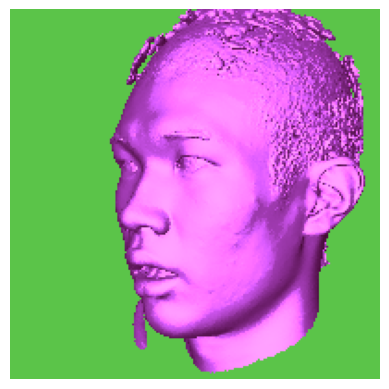

#############
torch.Size([1, 512])
torch.Size([1, 257, 768])
torch.Size([1, 768])
018


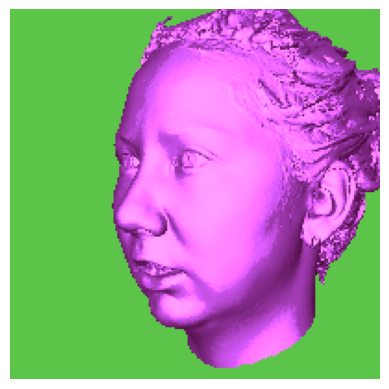

#############
torch.Size([1, 512])
torch.Size([1, 257, 768])
torch.Size([1, 768])
{'heads': [{'subject': '017', 'expression neutral': '010', 'description neutral': 'A young Asian man with oval face, monolid eyes, snub nose and short hair.', 'CLIP embedding': tensor([[ 8.6708e-02, -1.6925e-01,  3.7150e-02, -1.8635e-01,  3.6569e-01,
         -7.6159e-01, -3.3314e-01,  4.8563e-01,  9.1777e-01,  2.2992e-01,
          1.6232e-02, -2.4209e-01, -8.9345e-01,  3.4014e-01,  2.8816e-01,
         -1.8022e-01,  1.1965e+00, -1.6467e-01, -1.5862e-01, -8.9383e-02,
          6.1356e-01,  6.2191e-02, -1.9591e-01, -2.7113e-01,  9.4544e-02,
          5.6896e-01, -3.4044e-01, -2.2487e-02, -1.1718e-01, -3.6315e-01,
          5.3817e-01, -3.7941e-01, -2.8356e-02,  3.5359e-01, -1.8154e-01,
         -2.3813e-01,  5.9978e-01,  2.8238e-01,  1.1810e-02, -1.1880e+00,
         -8.1078e-01,  5.7946e-01, -4.0435e-01, -2.6577e-01,  3.0967e-02,
          1.0843e+00, -4.0725e-01,  2.9858e-02,  1.7087e-01, -1.2183e-01,
 

In [5]:
resolution = 200

camera_params = {
    "camera_distance": 0.21,
    "camera_angle": 45.,
    "focal_length": 2.57,
    "max_ray_length": 3,
    # Image
    "resolution_y": resolution,
    "resolution_x": resolution
}
phong_params = {
    "ambient_coeff": 0.51,
    "diffuse_coeff": 0.75,
    "specular_coeff": 0.64,
    "shininess": 0.5,
    # Colors
    "object_color": torch.tensor([0.53, 0.24, 0.64]),
    "background_color": torch.tensor([0.36, 0.77, 0.29])
}

light_params = {
    "amb_light_color": torch.tensor([0.9, 0.16, 0.55]),
    # light 1
    "light_intensity_1": 1.42,
    "light_color_1": torch.tensor([0.8, 0.97, 0.89]),
    "light_dir_1": torch.tensor([-0.6, -0.4, -0.67]),
    # light p
    "light_intensity_p": 0.62,
    "light_color_p": torch.tensor([0.8, 0.97, 0.89]),
    "light_pos_p": torch.tensor([1.19, -1.27, 2.24])
}

sdf = None
lat_rep = None
for entry in data['heads']:
    subj_number = entry['subject']
    expr_number = entry['expression neutral']

    with torch.no_grad():
        rendered_image = render(sdf, lat_rep, camera_params, phong_params, light_params, int(subj_number), int(expr_number))

    print(subj_number)
    plt.imshow(rendered_image.detach().numpy())
    plt.axis('off')  # Turn off axes
    plt.show()
    print('#############')

    # --- CLIP Embedding ---
    image_c_first = rendered_image.permute(2, 0, 1)
    with torch.no_grad():
        image_preprocessed = clip_tensor_preprocessor(image_c_first).unsqueeze(0)
        CLIP_embedding = CLIP_model.encode_image(image_preprocessed) # [1, 512]
        CLIP_embedding /= CLIP_embedding.norm(dim=-1, keepdim=True)
    entry['CLIP embedding'] = CLIP_embedding

    # --- DINO Embedding ---
    with torch.no_grad():
        input = DINO_processor(images=rendered_image, return_tensors="pt", do_rescale=False).to(device)
        output = DINO_model(**input)
        CLS_token = output.last_hidden_state # [1, 257, 768]
        DINO_embedding  = CLS_token.mean(dim=1) # [1, 768]
        DINO_embedding /= DINO_embedding.norm(dim=-1, keepdim=True)
    entry['DINO embedding'] = DINO_embedding


   



In [9]:
# Save data as a JSON file
save_path = '/Users/katharinaschmid/Text2Head/data/val_set_annotations.json'
with open(save_path, "w") as json_file:
    json.dump(data, json_file)